In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

In [5]:
ser = Service('../chrome_driver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [6]:
url = 'http://search.danawa.com/dsearch.php?k1=무선청소기'
driver.get(url)

In [7]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html class="js no-touch" lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>무선청소기 : 다나와 통합검색</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="무선청소기 통합검색 : 다나와 통합검색" name="title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." name="description"/>
<meta content="무선청소기, 다나와, 최저가, 가격비교, 검색, 통합검색, 샤오미 무선청소기, 차이슨 무선청소기, 다이슨 무선청소기, 무선청소기 삼성전자, 일렉트로룩스 무선청소기, 무선청소기 아이닉 i20, 디베아 차이슨 무선청소기 2021년형, 무선청소기 테팔, 삼성 비스포크 제트 무선청소기, 디베아 무선청소기" name="keywords"/>
<meta content="무선청소기 통합검색 : 다나와 통합검색" property="og:title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." property="og:description"/>
<meta content="http://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" property="og:image"/>
<meta content="width=1280" name="viewport"/>
<link href="//img.danawa.com/new/danawa_main/v1/img/danawa_favicon.ico" rel="shortcut icon"/>
<link href="//static.danawa.com/css/common.css?v=2201051636" rel="styleshee

In [8]:
prod_items = soup.select('div.main_prodlist.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

44

In [9]:
# prod_items[0].select('a.click_log_product_standard_title_')[0].text
title = prod_items[0].select('p.prod_name > a')[0].text 
title

'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571'

In [10]:
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
spec_list

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm'

In [11]:
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].\
        text.strip().replace(',','') 
price

'1055140'

In [12]:
print(title, spec_list, price, sep = '   |||   ')

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571   |||   핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm   |||   1055140


In [116]:
prod_data = []

for prod_item in prod_items : 
    try : 
        title = prod_item.select('p.prod_name > a')[0].text 
    except : 
        title = ''
    try : 
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except : 
        spec_list = ''
    try : 
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].\
        text.strip().replace(',','') 
    except : 
        price = 0
    
    mylist = [title, spec_list, price]
    
    prod_data.append(mylist)
    
prod_data

[['쿠쿠전자 CVC-B1020UG',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 싸이클론 / BLDC모터 / 사용시간(개당): 33분 / [필터] 헤파필터 / H13급 / 4단계여과 / [기능] 배터리잔량표시 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 거치대 / [부가] 색상: 매트그레이 / 무게: 2.7kg / 크기(가로x세로x깊이): 240x1170x260mm',
  '188330'],
 ['툴앤툴 네오스틱 NEW T5',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 소비전력: 160W / [성능] 흡입력: 18000Pa / 싸이클론 / [배터리] 충전시간: 3~4시간 / 사용시간(개당): 35분 / 리튬이온 / [필터] 헤파필터 / H14급 / 4단계여과 / [기능] LED라이트 / 프리볼트 / [구성] 바닥 / 솔형 / 연장툴 / 거치대 / [부가] 먼지통용량: 0.65L / 색상: 모던화이트 / 무게: 1.97kg / 크기(가로x세로x깊이): 250x1210x220mm',
  '109000'],
 ['지웰 벤투스 아쿠아',
  '물걸레청소기 / 스틱형 / 물걸레+진공 / 회전식 / 무선형 / 배터리: 리튬이온 / 충전시간: 4~5시간 / 사용시간(개당): 30분 / [부가] 색상: 화이트+블루, 네이비 / 무게: 3kg / 브러쉬: 바닥, 물걸레',
  '160650'],
 ['스마트에버 S250W',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 250W / [성능] 흡입력: 20000Pa / 싸이클론 / BLDC모터 / [배터리] 충전시간: 4시간30분 / 사용시간(개당): 25분 / 분리형 (1개) / [필터] 헤파필터 / H13급 / 4단계여과 / [기능] 프리볼트 / [구성] 바닥 / [부가] 먼지통용량: 0.5L / 색상: 퍼플 / 무게: 1.46kg / 크기(가로x세로x깊이): 240x1010x45mm',
  '119000'],
 ['1FPB5cvS4N', '1FP

In [117]:
def get_prod_itmes(prod_items) :
    prod_data = []

    for prod_item in prod_items : 
        try : 
            title = prod_item.select('p.prod_name > a')[0].text 
        except : 
            title = ''
        try : 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except : 
            spec_list = ''
        try : 
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].\
            text.strip().replace(',','') 
        except : 
            price = 0

        mylist = [title, spec_list, price]

        prod_data.append(mylist)
        
    return(prod_data)

In [118]:
prod_data = get_prod_itmes(prod_items)
print(len(prod_data))

44


In [119]:
# http://search.danawa.com/dsearch.php?k1=무선청소기

# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods

In [120]:
def get_search_page_url(keyword, page) : 
    url = 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods'.\
            format(keyword, keyword, page)
    return(url)

In [121]:
def get_search_page_url(keyword, page) : 
    url = 'http://search.danawa.com/dsearch.php?query={0}&originalQuery={0}&volumeType=allvs&page={1}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods'.\
            format(keyword, page)
    return(url)

In [122]:
url = get_search_page_url('무선청소기', '1')
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods


In [123]:
import time
from tqdm import tqdm_notebook

In [32]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1,total_page + 1)) :
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.main_prodlist.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_itmes(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

C:\Users\jjunghu\AppData\Local\Temp/ipykernel_20448/1142219361.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page + 1)) :


  0%|          | 0/10 [00:00<?, ?it/s]

In [124]:
len(prod_data_total)

440

In [171]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('./danawa_crawling_result_class.xlsx', index = False)

In [126]:
import pandas as pd
data = pd.read_excel('./danawa_crawling_result_class.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      440 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


In [127]:
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1055260
1,nIApCbkTBd,nIApCbkTBd233538,233538
2,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,564850
3,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,784550
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",59840


In [128]:
# 회사명, 모델명 정리

company_list = []
product_list = []

for title in data['상품명'] : 
    try : 
        title_info = title.split(' ', 1)
        company_name = title_info[0]
        product_name = title_info[1]
        
        company_list.append(company_name)
        product_list.append(product_name)

    except : 
        company_list.append(None)
        product_list.append(None)
    
# 중간에 결측치가 있어 try, except로 시도해야함

In [129]:
print(len(data))
print(len(company_list))
print(company_list[:5])
print(len(product_list))
print(product_list[:5])

440
440
['LG전자', None, '삼성전자', 'LG전자', '샤오미']
440
['오브제컬렉션 코드제로 ThinQ A9S AO9571', None, '비스포크 제트 VS20A956A3', '코드제로 ThinQ A9S AS9370IKT', 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']


In [130]:
data['상품명']

0          LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1                                 nIApCbkTBd
2                    삼성전자 비스포크 제트 VS20A956A3
3              LG전자 코드제로 ThinQ A9S AS9370IKT
4      샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)
                       ...                  
435                     테팔 에어포스 라이트 TY6545KL
436                       스윙 파워스윙 SWING-8000
437                            이나프 ILVH-1000
438                   일렉트로룩스 퓨어 F9 PF91-5EBF
439                              오아 OA-CL010
Name: 상품명, Length: 440, dtype: object

In [131]:
title = 'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571'
info = title.split(' ', 1)
info[0]
info[1]

'오브제컬렉션 코드제로 ThinQ A9S AO9571'

In [132]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm'

In [133]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '소비전력: 590W',
 '[성능] 흡입력: 210W',
 '2중터보싸이클론',
 '스마트인버터모터',
 '[배터리] 충전시간: 4시간',
 '사용시간(개당): 1시간',
 '분리형 (2개)',
 '리튬이온',
 '[필터] 분리형배기필터',
 '헤파필터',
 'H13급',
 '5단계여과',
 '[기능] 자동물공급',
 '배터리잔량표시',
 'IoT기능',
 '자동먼지비움',
 '[구성] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 색상: 카밍베이지',
 '무게: 2.6kg',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [134]:
category = spec_list[0]
category

'핸디/스틱청소기'

In [135]:
for spec in spec_list : 
    if '사용시간' in spec : 
        use_time_spec = spec
    
    elif '흡입력' in spec : 
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

사용시간(개당): 1시간
[성능] 흡입력: 210W


In [136]:
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suction_spec.split(':')[1].strip()

print(use_time_value)
print(suction_value)

1시간
210W


In [137]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록'] : 
    try : 
        spec_list = spec_data.split(' / ')
    except:
        pass
    
    category = spec_list[0].strip()
    category_list.append(category)
    
    for spec in spec_list : 
        if '사용시간' in spec : 
            use_time_spec = spec

        elif '흡입력' in spec : 
            suction_spec = spec
    
    use_time_value = use_time_spec.split(' ')[1].strip()
    suction_value = suction_spec.split(':')[1].strip()
    
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [138]:
print(category_list[:5])
print(use_time_list[:5])
print(suction_list[:5])

['핸디/스틱청소기', 'nIApCbkTBd233538', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기']
['1시간', '1시간', '1시간', '1시간', '30분']
['210W', '210W', '210W', '210W', '16,800Pa']


In [139]:
mytime = '1시간30분'
mytime.split('시간')
# mytime.split('시간')[-1].replace('분', '')
mytime.split('시간')[-1].split('분')[0]

'30'

In [140]:
def convert_time_minute(time) : 
    try : 
        if '시간' in time : 
            hour =  time.split('시간')[0]
            if '분' in time : 
                minute = time.split('시간')[-1].split('분')[0]
            else : 
                minute = 0
        else : 
            hour = 0
            minute = time.split('분')[0]
        
        return int(hour) * 60 + int(minute)
    
    except : 
        return None

In [141]:
time = '1시간40분'

result = convert_time_minute(time)
result

100

In [142]:
new_use_time_list = []

for time in use_time_list : 
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
new_use_time_list

[60,
 60,
 60,
 60,
 30,
 60,
 60,
 60,
 45,
 60,
 60,
 45,
 45,
 60,
 60,
 50,
 60,
 60,
 60,
 None,
 40,
 70,
 60,
 20,
 12,
 48,
 60,
 48,
 40,
 12,
 None,
 50,
 90,
 90,
 10,
 20,
 25,
 25,
 50,
 60,
 180,
 60,
 60,
 40,
 30,
 60,
 60,
 60,
 53,
 240,
 240,
 42,
 None,
 55,
 55,
 40,
 40,
 60,
 60,
 15,
 60,
 30,
 30,
 35,
 40,
 60,
 30,
 40,
 60,
 50,
 60,
 60,
 28,
 25,
 30,
 60,
 60,
 60,
 60,
 40,
 None,
 60,
 60,
 20,
 60,
 60,
 50,
 60,
 50,
 50,
 20,
 30,
 60,
 60,
 60,
 60,
 50,
 30,
 42,
 50,
 50,
 20,
 20,
 80,
 60,
 30,
 30,
 60,
 50,
 48,
 50,
 20,
 20,
 60,
 12,
 30,
 None,
 21,
 35,
 None,
 30,
 45,
 53,
 13,
 10,
 60,
 48,
 45,
 45,
 15,
 53,
 60,
 60,
 60,
 60,
 60,
 60,
 53,
 53,
 53,
 60,
 30,
 30,
 45,
 45,
 55,
 55,
 30,
 17,
 None,
 None,
 None,
 None,
 60,
 60,
 100,
 60,
 38,
 20,
 35,
 None,
 7,
 60,
 20,
 65,
 60,
 60,
 13,
 35,
 60,
 55,
 50,
 11,
 11,
 11,
 None,
 20,
 20,
 60,
 60,
 15,
 8,
 8,
 240,
 25,
 None,
 35,
 300,
 300,
 None,
 28,
 28,
 50,
 60

In [143]:
def get_suction(value) : 
    try :
        value = value.upper()
        
        if 'AW' in value or 'W' in value : 
            result = value.replace('A','').replace('W','').replace(',','')
            result = int(result)
            
        elif 'PA' in value : 
            result = value.replace('PA', '').replace(',','')
            result = int(result)/100
        else : 
            result = None
        
        return result
            
    except : 
        return None

In [144]:
new_suction_list = []

for power in suction_list : 
    value = get_suction(power)
    new_suction_list.append(value)
    
new_suction_list[:10]

[210, 210, 210, 210, 168.0, 210, 210, 200.0, 150.0, 220.0]

In [145]:
_

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60.0,210.0
1,nIApCbkTBd233538,None,None,233538,60.0,210.0
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,564850,60.0,210.0
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60.0,210.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),59840,30.0,168.0


In [151]:
condition = pd_data['카테고리'] == '핸디/스틱청소기'

pd_data_final = pd_data[condition]
pd_data_final.dropna(inplace = True)

pd_data_final.head()

C:\Users\jjunghu\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60.0,210.0
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,564850,60.0,210.0
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60.0,210.0
5,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804800,60.0,210.0
7,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0


In [152]:
len(pd_data_final)

266

In [154]:
pd_data_final.to_excel('./danawa_data_final_class.xlsx', index = False)

In [153]:
pd_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    266 non-null    object 
 1   회사명     266 non-null    object 
 2   제품      266 non-null    object 
 3   가격      266 non-null    int32  
 4   사용시간    266 non-null    float64
 5   흡입력     266 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 13.5+ KB


In [155]:
danawa_data = pd.read_excel('./danawa_data_final_class.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60,210
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,564850,60,210
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60,210
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804800,60,210
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200


In [156]:
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
205,핸디/스틱청소기,비브르,스톰파워 VE35,235000,50,310
130,핸디/스틱청소기,아이닉,NEW i20,188000,50,300
223,핸디/스틱청소기,캐치웰,NEW F8,189000,25,290
224,핸디/스틱청소기,블랙앤데커,PV1020,61470,11,290
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290


In [157]:
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
257,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
120,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
229,핸디/스틱청소기,에이스전자,에이스 K7,337470,70,200


In [158]:
top_list = danawa_data.sort_values(['사용시간','흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
257,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
120,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
118,핸디/스틱청소기,샤오미,드리미 T20,379000,70,250


In [159]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()

print( '가격 평균값', price_mean_value)
print( '흡입력 평균값', suction_mean_value)
print( '사용시간 평균값', use_time_mean_value)

가격 평균값 377507.5939849624
흡입력 평균값 167.89473684210526
사용시간 평균값 43.54135338345865


In [161]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)]

condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200
5,핸디/스틱청소기,샤오미,드리미 V10,155700,60,220
7,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,125870,45,210
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
24,핸디/스틱청소기,DIBEA,M24 MAX,139000,50,250
31,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 파워프로 PQ92-3OBF,276250,53,210
36,핸디/스틱청소기,샤오미,드리미 V11SE,180430,60,240


In [160]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family = 'Malgun Gothic')

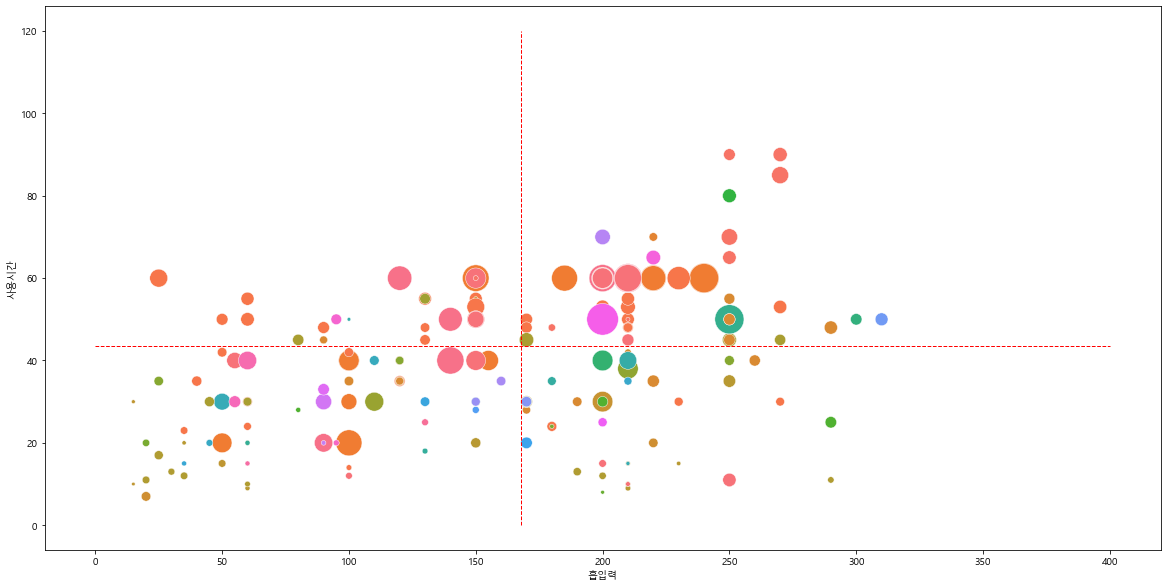

In [168]:
plt.figure(figsize = (20, 10))
sns.scatterplot( x = '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend = False,
               sizes = (10, 1000))

plt.hlines(use_time_mean_value, 0, 400, color = 'red',
          linestyle = 'dashed', linewidth = 1)

plt.vlines(suction_mean_value, 0, 120, color = 'red',
          linestyle = 'dashed', linewidth = 1)

plt.show()

In [169]:
chart_data_selected = top_list[:20]
chart_data_selected

,카테고리,회사명,제품,가격,사용시간,흡입력
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
257,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
120,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
118,핸디/스틱청소기,샤오미,드리미 T20,379000,70,250
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
229,핸디/스틱청소기,에이스전자,에이스 K7,337470,70,200
102,핸디/스틱청소기,샤오미,G10,256950,65,250
248,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65,220
16,핸디/스틱청소기,다이슨,V15 디텍트 앱솔루트 엑스트라,1246540,60,240


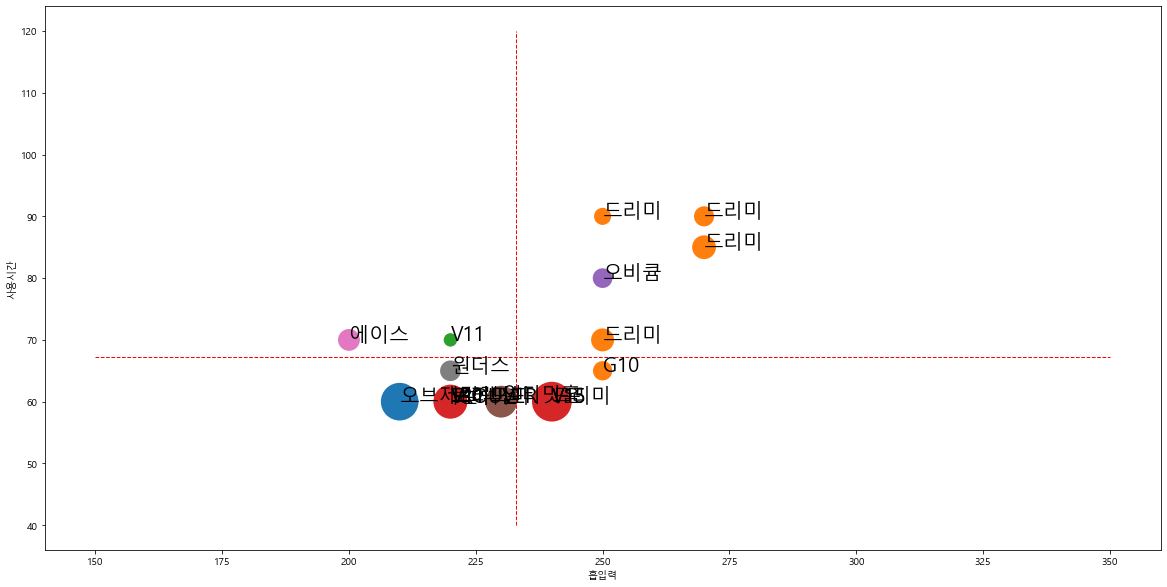

In [170]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize = (20, 10))
sns.scatterplot( x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = danawa_data, legend = False,
               sizes = (100, 2000))

plt.hlines(use_time_mean_value, 150, 350, color = 'red',
          linestyle = 'dashed', linewidth = 1)

plt.vlines(suction_mean_value, 40, 120, color = 'red',
          linestyle = 'dashed', linewidth = 1)

for index, row in chart_data_selected.iterrows() : 
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size = 20)

plt.show()